# Task 2:SUPERVISED ML

In this task we will predict the percentage of marks of an student based on the number of
study hours

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing data

In [18]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<Figure size 432x288 with 0 Axes>

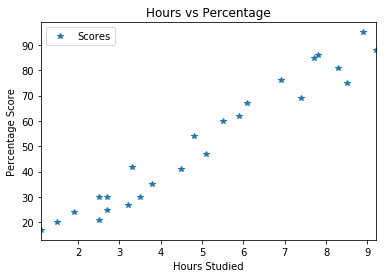

In [19]:
plt.figure()
data.plot(x='Hours',y='Scores',style='*');
plt.title('Hours vs Percentage'); 
plt.xlabel('Hours Studied'); 
plt.ylabel('Percentage Score');  
plt.show()

This plot shows that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

In [20]:
X=data.iloc[:,0:1].values
y=data.iloc[:,1].values

We will now split the data using scikit-learn's train_test_spit() method, we will use 20% of the data for the test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the model

In [22]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train);
print('Training complete')

Training complete


In [23]:
m=linreg.coef_
c=linreg.intercept_
line=m*X+c

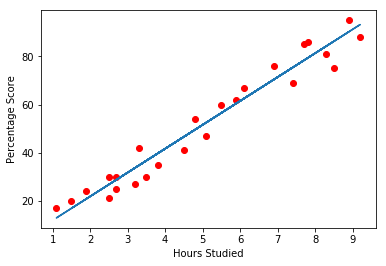

In [24]:
plt.figure()
plt.scatter(X,y,color='r')
plt.plot(X,line)
plt.xlabel('Hours Studied'); 
plt.ylabel('Percentage Score');
plt.show()

# Prediction

In [25]:
y_pred=linreg.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
hr=9.25
my_pred = linreg.predict([[hr],])
print("predicted score: {}".format(my_pred[0]))

predicted score: 93.6917324874


# Error in the model

In [28]:
from sklearn import metrics  
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Test Score: {}'.format(linreg.score(X_test,y_test)))
print('train Score: {}'.format(linreg.score(X_train,y_train)))

Mean Absolute Error: 4.183859899
Test Score: 0.945490689211
train Score: 0.951551072521
